Once deleted, variables cannot be recovered. Proceed (y/[n])? y


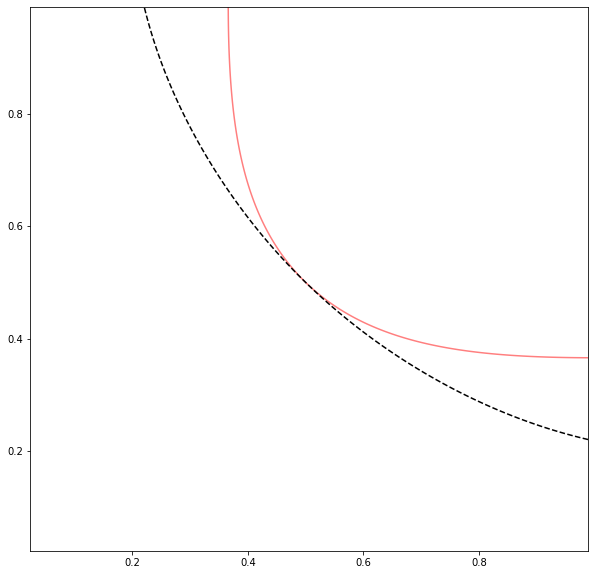

In [20]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt

N1 = 1.0
N2 = 1.0
N3 = 1.0  #m3 = m ==> m=1
chi12 = 2.0
chi13 = 1.0
chi23 = 1.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

# x:phi1 y:phi2 z:phi3
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2
    
#     psi1 = N1 * phi1 / (1. - 2. * chi1 * N1 * phi1)
#     psi2 = N2 * phi2 / (1. - 2. * chi2 * N2 * phi2)
#     psi3 = N3 * phi3 / (1. - 2. * chi3 * N3 * phi3)

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)



x, y = np.meshgrid(
    np.arange(.023, .99, 0.003),
    np.arange(.023, .99, 0.003)
                )

plt.figure(figsize=(10,10))
plt.contour(x, y,
             equations([x, y])[0], 
             levels=[0], alpha=0.5, cmap='rainbow_r')
plt.contour(x, y,
             equations([x, y])[1],
            levels=[0], alpha=1, cmap='gray', linestyles='dashed')

plt.show()

In [21]:
# grid = [[0.55,0.25],[0.25,0.25],[0.25,0.55],[0.8,0.8]] 

# from sympy import *   

# roots_sy =[]
# x, y = symbols('x, y')                                                                                                                               
# for i in range(len(grid)):
#     aaa = nsolve([Eq(2.*sin(0.5*x)+y, 0.), Eq(cos(x)+y, 0.)], [x, y], grid[i], verify=False)
#     aaa = np.array(aaa, dtype=np.float32).flatten()
#     if (np.array(equations(aaa))<1e-4).all(): roots_sy.append(aaa)
#     else: print('no root found')
# roots_sy = np.reshape(roots_sy, (len(roots_sy), 2))
# roots_sy

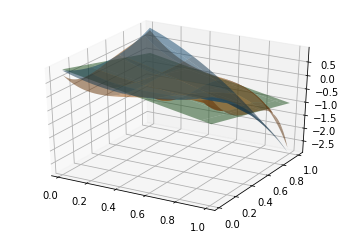

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


X, Y = np.meshgrid(np.arange(0.023, .99, 0.003),np.arange(0.023, .99, 0.003))
Z = 1.0 - X - Y
psi3 = N3*Z/(1.0-2.0*chi2*N3*Z)

Z1 = equations([X,Y])[0]
Z2 = equations([X,Y])[1]
Z3 = Z

ax.plot_surface(X,Y,Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z2, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z3, alpha=0.5, rstride=100, cstride=100)


plt.show()


In [23]:
equations([0.3, 0.201])

(0.37916079999999996, 0.08384758152371198)

In [24]:
chi3

0.0